<a href="https://colab.research.google.com/github/vithushanms/micrograd-backpropagation/blob/main/%5BArtificial_Neural_Networks%5D_%5BExercise%5D_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample of the micrograd 

Git repo: https://github.com/karpathy/micrograd/tree/master/micrograd

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# just defining the function
def f(x):
  return 3*x**2 - 4*x + 5

In [4]:
#test the function
f(2.0)

9.0

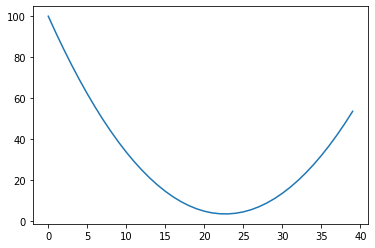

In [5]:
#creating a range 
xs = np.arange(-5,5,0.25)

#adding the range to the function and getting the oputput range
ys = f(xs)

#plotting the outcome range 
plt.plot(ys)

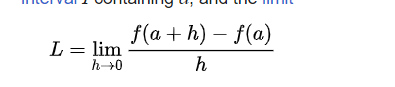

In [6]:
#So here the derivative will give us the sloap of the function

#from the small adjustment h we make to the function f will see what happens  
h = 0.00000001
x = 3
(f(x + h) - f(x))/h

14.00000009255109

In [7]:

a = 2.0
b = -3.0
c = 10.0

d = a*b + c

print(d)

#here if we take a function and try to adjust this by a very small ammount h
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

4.0
d1 4.0
d2 4.0001
slope 0.9999999999976694


In [8]:
# Trying to represent a simple math object to explain the behaviour of mathematical activasion functions 

class Value:
  def __init__(self, data):
    self.data = data

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    return Value(self.data + other.data)

  def __mul__(self, other):
    return Value(self.data * other.data)

In [9]:
a = Value(2.0)
b = Value(3.0)

a + b
c = a + b 
d = c + a
d

Value(data=7.0)

In [10]:
# modifying the Value object to accept multple nodes of Value objects
class Value:
  def __init__(self, data, _children = (), _op=''):
    self.data = data
    self._prev = set(_children) 
    self._op = _op

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    return Value(self.data + other.data, (self, other), "+")

  def __mul__(self, other):
    return Value(self.data * other.data, (self, other), "*")

In [11]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
f = a * b

a.__mul__(b)

#Value(data = 2.0*-3.0, (a,b), "*") = f
# f._prev = (a,b)

d = f + c

f.__add__(c)

#Value(-6.0+10.0, (f,c), "+")

#d -> (f,c)     , f -> (a,b)

(a.__mul__(b)).__add__(c)


Value(data=4.0)

In [12]:
#This is just a code that we don't really need to understand, just used for visualization helper functions--------------

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ data %.4f }" % ( n.data,), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

#-----------------------------------------------------------------------------------------------------------------------------------

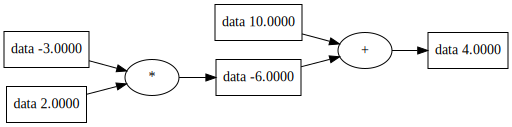

In [13]:
# call from the visualization function to show the Value object in graph
draw_dot(d)

In [14]:
#changing the chart libraries to show the label---------------------------------------------

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data,), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

#-----------------------------------------------------------------------------------------------------------------------------------

In [15]:
#changing the Value model to accept labels
class Value:
  def __init__(self, data, _children = (), _op='', label = ''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    return Value(self.data + other.data, (self, other), "+")

  def __mul__(self, other):
    return Value(self.data * other.data, (self, other), "*") 

In [16]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label = 'f')
L = d* f
L.label = 'L'
L

Value(data=-8.0)

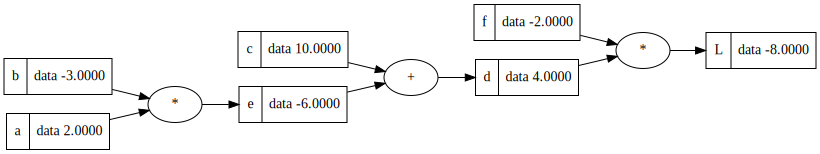

In [17]:
draw_dot(L)

In [18]:
#Modifying Value to store the derev
class Value:
  def __init__(self, data, _children = (), _op='', label = ''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label
    self.grad = 0

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    return Value(self.data + other.data, (self, other), "+")

  def __mul__(self, other):
    return Value(self.data * other.data, (self, other), "*") 


In [19]:
#changing the chart libraries to show the derivative---------------------------------------------

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data,n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

#-----------------------------------------------------------------------------------------------------------------------------------

In [20]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label = 'f')
L = d* f
L

L.grad = 1.0
d.grad = -2
f.grad = 4


d = e + c
L.label = 'L'

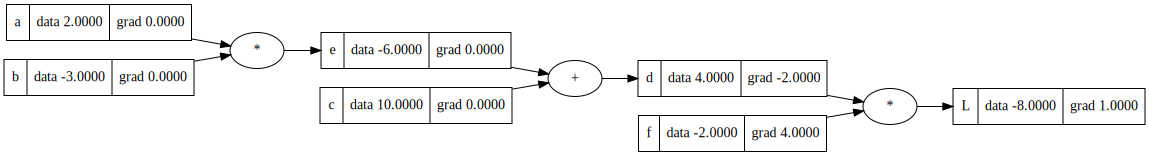

In [21]:
draw_dot(L)

In [22]:
"""
dL/df

L = d * f
dL/df = dd/df * 1

L1 = d*(f+h) 
(L1 - L) / h
(d(f+h) - d*f) / h
(df + dh - df) / h 
dh / h
d
"""

def lol():
  h = 0.000001

  a = Value(2.0, label = 'a')
  b = Value(-3.0, label = 'b')
  c = Value(10.0, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d* f
  L1 = L.data 

  a = Value(2.0, label = 'a')
  b = Value(-3.0, label = 'b')
  c = Value(10.0, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  d.data += h
  f = Value(-2.0, label = 'f')
  L = d* f
  L2 = L.data

  print("L1=", L1, "L2=", L2 )

  print("gard", (L2-L1)/h) #L2 = L1 + h
  
lol()

L1= -8.0 L2= -8.000002
gard -2.000000000279556


Chain Rule : https://en.wikipedia.org/wiki/Chain_rule

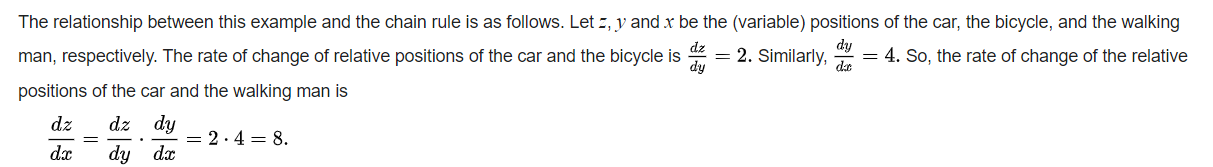

Tanh: https://en.wikipedia.org/wiki/Hyperbolic_functions

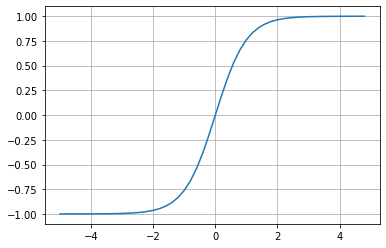

In [23]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); 
plt.grid();

In [24]:
#Modifying value function to add tanh
class Value:
  def __init__(self, data, _children = (), _op='', label = ''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label
    self.grad = 0

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    return Value(self.data + other.data, (self, other), "+")

  def __mul__(self, other):
    return Value(self.data * other.data, (self, other), "*") 

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    return out

In [25]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

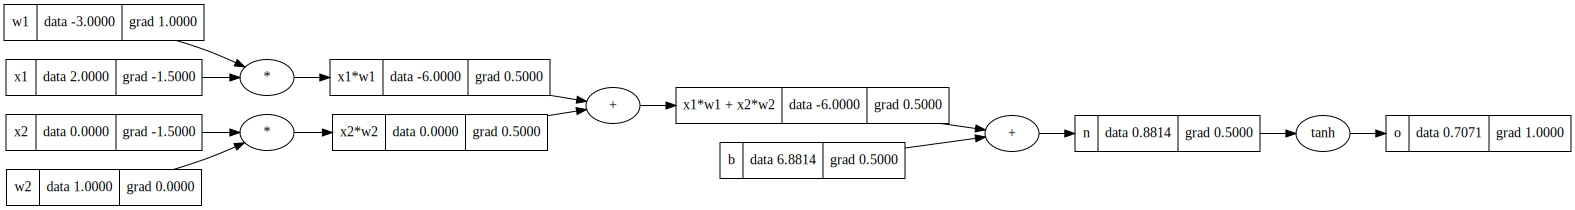

In [43]:
draw_dot(o)

In [27]:
o.grad = 1

In [34]:
#do/dn = 1 - tan**2(n)  = #do/dn = 1 - o**2(n)
1 - o.data**2

0.4999999999999999

In [42]:
"""
d(o)/d(w1) = d(w1)/d(x1w1)  *  d(dx1w1)/d(0)
           = 0.5 *  2
           = 1
"""

b.grad = 0.5
x1w1x2w2.grad = 0.5
x1w1.grad = 0.5
x2w2.grad = 0.5
w1.grad = x1.data * x1w1.grad
x1.grad = w1.data * x1w1.grad
w2.grad = x2.data * x2w2.grad
x2.grad = w1.data * x2w2.grad


In [67]:
#Modifying the value object to have backward functions
class Value:
  def __init__(self, data, _children = (), _op='', label = ''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label
    self.grad = 0.0
    self._backward = lambda : None 

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), "+")
    
    def backward_fun():
        self.grad = 1.0 * out.grad
        other.grad = 1.0 * out.grad
    out._backward = backward_fun

    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), "*") 
    
    def backward_fun():
        self.grad = other.data * out.grad
        other.grad = self.data * out.grad
    out._backward = backward_fun

    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def backward_fun():
        out.grad = 1.0
        self.grad = 1 - t**2 
    out._backward = backward_fun

    return out

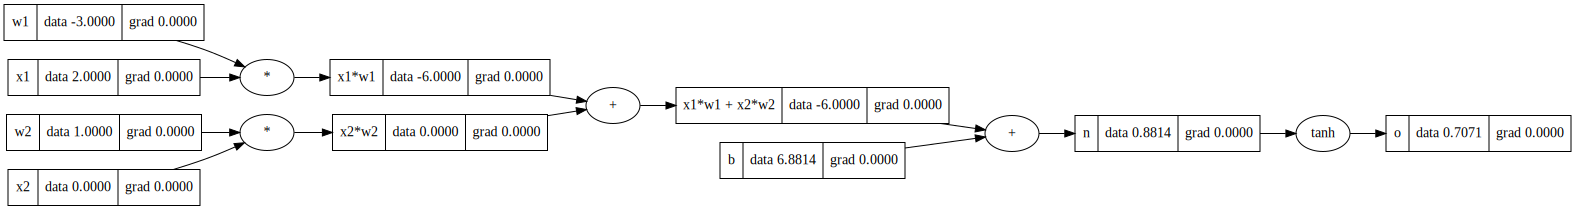

In [71]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

o._backward()
n._backward()
b._backward()
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()

draw_dot(o)

In [62]:
from types import BuiltinFunctionType
#using topological sort to call each backward functions 

topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)

build_topo(o)
topo

[Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [69]:
#Changing the value object to automatically call the backfward function
class Value:
  def __init__(self, data, _children = (), _op='', label = ''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label
    self.grad = 0.0
    self._backward = lambda : None 

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), "+")
    
    def backward_fun():
        self.grad = 1.0 * out.grad
        other.grad = 1.0 * out.grad
    out._backward = backward_fun

    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), "*") 
    
    def backward_fun():
        self.grad = other.data * out.grad
        other.grad = self.data * out.grad
    out._backward = backward_fun

    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def backward_fun():
        out.grad = 1.0
        self.grad = 1 - t**2 
    out._backward = backward_fun

    return out

  def backward(self):
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()


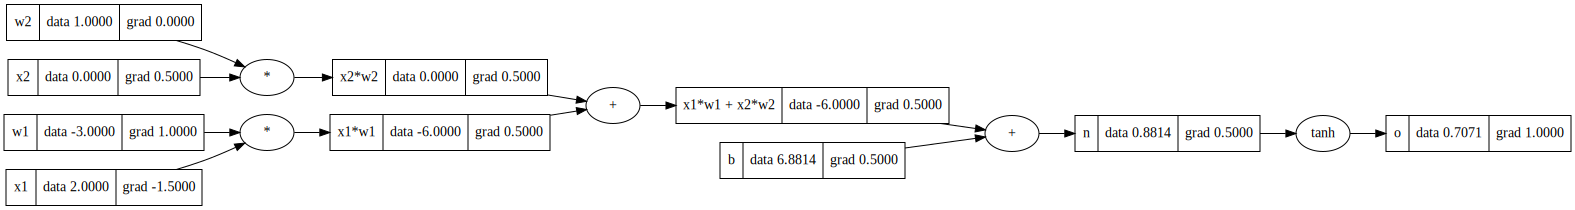

In [74]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

o.backward()

draw_dot(o)



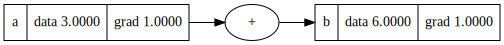

In [75]:
#There is a probelm in above aproach where the derevative can get wrong
a = Value(3.0, label='a')
b = a + a; b.label = 'b'
b.backward()
draw_dot(b)

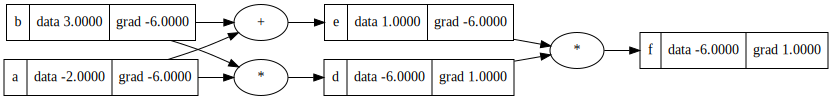

In [76]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

So considering the chain rule in such scenarios we need to accumulate the grad

In [80]:
#Modifying the value option to accumelate the grad as well as accept instance of numbers too
class Value:
  def __init__(self, data, _children = (), _op='', label = ''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label
    self.grad = 0.0
    self._backward = lambda : None 

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), "+")
    
    def backward_fun():
        self.grad += 1.0 * out.grad
        other.grad += 1.0 * out.grad
    out._backward = backward_fun

    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), "*") 
    
    def backward_fun():
        self.grad += other.data * out.grad
        other.grad += self.data * out.grad
    out._backward = backward_fun

    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def backward_fun():
        out.grad += 1.0
        self.grad += 1 - t**2 
    out._backward = backward_fun

    return out

  def backward(self):
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

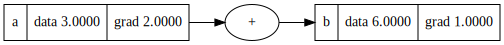

In [81]:
a = Value(3.0, label='a')
b = a + a; b.label = 'b'
b.backward()
draw_dot(b)

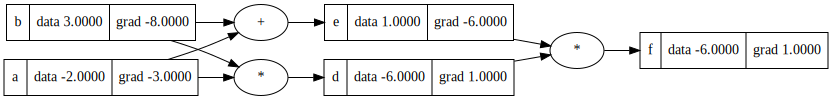

In [82]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)